In [1]:
import tensorflow as tf
from google.colab import drive
import zipfile
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2

In [2]:
drive.mount("/content/sample_data/drive")

Mounted at /content/sample_data/drive


In [3]:
with zipfile.ZipFile('/content/sample_data/drive/My Drive/archive.zip', 'r') as zipObj:
   zipObj.extractall('/content/sample_data')

In [4]:
path = '/content/sample_data/landscape Images'
color_image_list = os.listdir(os.path.join(path, 'color'))
gray_image_list = os.listdir(os.path.join(path, 'gray'))
color_images = []
gray_images = []
for image in color_image_list:
    img = plt.imread(os.path.join(path, 'color', image))
    color_images.append(cv2.resize(img, (150, 150))/255)
for image in color_image_list:
    img = plt.imread(os.path.join(path, 'gray', image))
    gray_images.append(cv2.resize(img, (150, 150))/255)
gray_images = np.asarray(gray_images)
color_images = np.asarray(color_images)

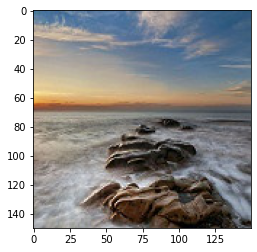

In [5]:
plt.imshow(color_images[2])

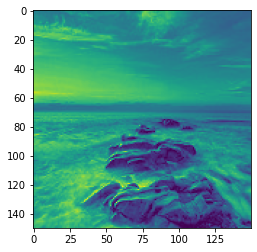

In [6]:
plt.imshow(gray_images[2])

In [7]:
im_shape = (150, 150, 1)

inp = tf.keras.layers.Input(shape=im_shape)
h1 = tf.keras.layers.Conv2D(filters = 64, kernel_size =(3, 3), activation='relu', padding='same')(inp)
h2 = tf.keras.layers.Conv2D(filters = 32, kernel_size =(3, 3), activation='relu', padding='same')(h1)

h3 = tf.keras.layers.Conv2D(filters = 32, kernel_size =(3, 3), activation='relu', padding='same')(h2)
h4 = tf.keras.layers.Conv2D(filters = 64, kernel_size =(3, 3), activation='relu', padding='same')(h3)
o = tf.keras.layers.Conv2D(filters =3, kernel_size =(3, 3), activation='sigmoid', padding='same')(h4)

model = tf.keras.models.Model(inputs=inp, outputs=o)

In [8]:
optimizer = tf.keras.optimizers.Adam(lr=1e-3)
model.compile(loss='binary_crossentropy', optimizer=optimizer)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 150, 150, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      18464     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 150, 150, 3)       1731      
Total params: 48,579
Trainable params: 48,579
Non-trainable params: 0
_________________________________________________________

In [9]:
history = model.fit(gray_images, color_images, epochs=15, batch_size=128, validation_split=0.3)

Epoch 1/15
39/39 [==============================] - 69s 785ms/step - loss: 0.6516 - val_loss: 0.5447
Epoch 2/15
39/39 [==============================] - 20s 507ms/step - loss: 0.5462 - val_loss: 0.5370
Epoch 3/15
39/39 [==============================] - 19s 501ms/step - loss: 0.5385 - val_loss: 0.5309
Epoch 4/15
39/39 [==============================] - 19s 494ms/step - loss: 0.5351 - val_loss: 0.5276
Epoch 5/15
39/39 [==============================] - 19s 493ms/step - loss: 0.5322 - val_loss: 0.5269
Epoch 6/15
39/39 [==============================] - 19s 498ms/step - loss: 0.5311 - val_loss: 0.5257
Epoch 7/15
39/39 [==============================] - 19s 500ms/step - loss: 0.5287 - val_loss: 0.5229
Epoch 8/15
39/39 [==============================] - 19s 497ms/step - loss: 0.5281 - val_loss: 0.5228
Epoch 9/15
39/39 [==============================] - 19s 496ms/step - loss: 0.5236 - val_loss: 0.5217
Epoch 10/15
39/39 [==============================] - 19s 497ms/step - loss: 0.5240 - val_lo

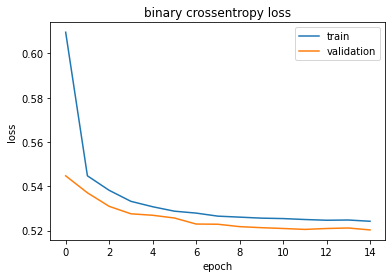

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('binary crossentropy loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

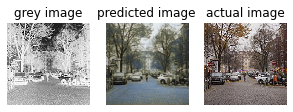

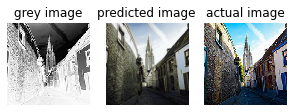

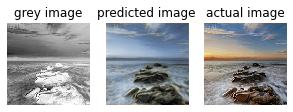

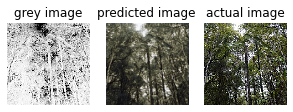

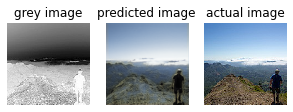

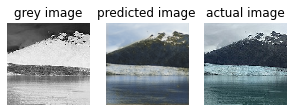

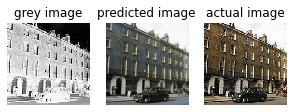

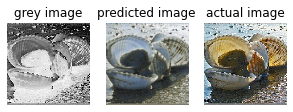

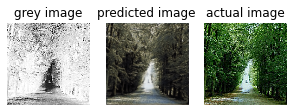

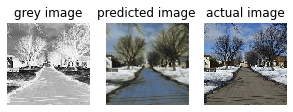

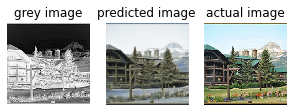

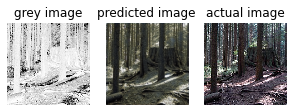

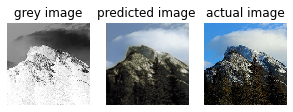

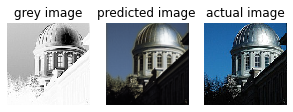

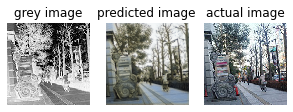

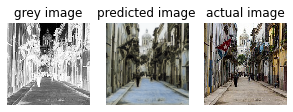

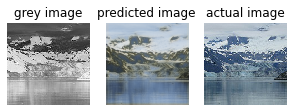

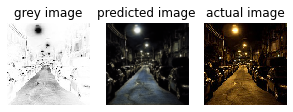

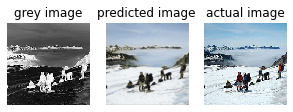

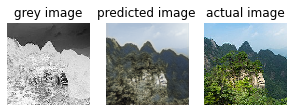

In [12]:
for image in range(0,20):
    fig, ax = plt.subplots(1, 3 , figsize=(5, 5))
    ax[1].imshow(model.predict(gray_images[image:image+1])[0])
    ax[1].axis('off')
    ax[1].set_title("predicted image")
    ax[0].imshow(gray_images[image], interpolation='nearest', cmap="Greys")
    ax[0].axis('off')
    ax[0].set_title("grey image")
    ax[2].imshow(color_images[image], interpolation='nearest')
    ax[2].set_title("actual image")
    ax[2].axis('off')